# Figure S12: Modulation of decision parameters during sessions and across action costs in dStr-lesioned rats.

## setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [2]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [3]:
rat_markers = {}
sequence = {}

# INTACT RATS
animalList = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42',
            'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52']
x = 0
palette = create_kiwi_green_palette(num_shades=len(animalList))
for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    if fnmatch.fnmatch(animal, 'Rat*'):
        rat_markers[animal]=[palette[x], 'o']
        x += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

rat_markers['RatM00'] = ['orange', 'o', '-']

Loading data for RatF30
Loading data for RatF31
Loading data for RatM30
Loading data for RatF40
Loading data for RatF41
Loading data for RatM41
Loading data for RatM42
Loading data for RatF50
Loading data for RatF51
Loading data for RatF52
Loading data for RatM50
Loading data for RatM51
Loading data for RatM52


# S12A Schematics of three action cost conditions with increasing platform distances
# S12D Same with treadmill belt velocity

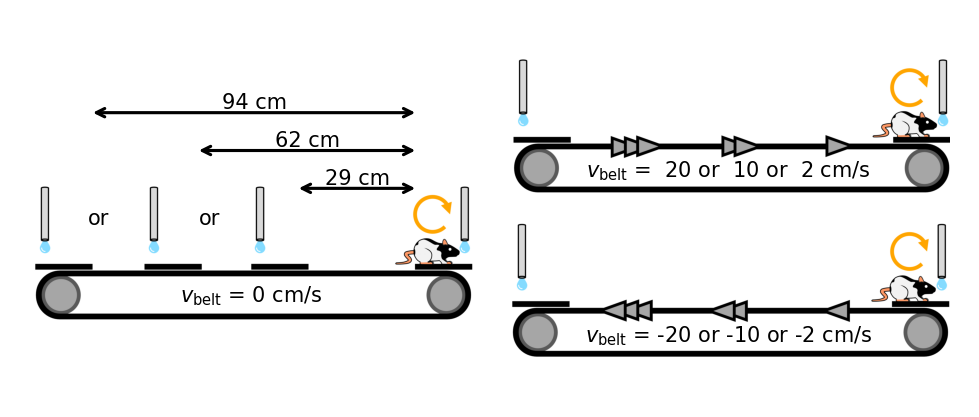

In [4]:
def FigureS12A(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "./Figures/3Aidle.png"

    img = plt.imread(path)
    img = img[300:2600, 150:3075]
    img = np.concatenate((np.ones((300, img.shape[1], 3), dtype=np.uint8), img), axis=0)
    
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ = 0 cm/s', x=img.shape[1]/2, y=1760, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=450, y=1250, ha="center", va="center", fontsize=5)
    ax.text(s='or', x=1185, y=1250, ha="center", va="center", fontsize=5)

    ax.annotate(text='', xy=(1720, 1050), xytext=(2600, 1050), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(1060, 800), xytext=(2600, 800), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    ax.annotate(text='', xy=(360, 550), xytext=(2600, 550), arrowprops=dict(arrowstyle='<->', lw=0.75), fontsize=5, zorder=5)
    
    ax.annotate(text='29 cm', xy=(0, 0), xytext=((1720+2600)/2, 1050), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='62 cm', xy=(0, 0), xytext=((1060+2600)/2, 800), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)
    ax.annotate(text='94 cm', xy=(0, 0), xytext=((360+2600)/2, 550), ha='center', va='bottom', xycoords='data', fontsize=5, zorder=5)

def FigureS12D(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "./Figures/3Didle.png"

    img = plt.imread(path)
    img = img[:, 150:3075]
    ax.imshow(img)
    ax.axis("off")
    ax.text(s=r'$v_{\mathrm{belt}}$ =  20 or  10 or  2 cm/s', x=img.shape[1]/2, y=930, ha="center", va="center", fontsize=5)
    ax.text(s=r'$v_{\mathrm{belt}}$ = -20 or -10 or -2 cm/s', x=img.shape[1]/2, y=2020, ha="center", va="center", fontsize=5)

fig, axs = plt.subplots(1, 2, figsize=(cm2inch(8), cm2inch(4)))
FigureS12A(ax=axs[0])
FigureS12D(ax=axs[1])

# S12B Effect of distance on α0, αt and αu
# S12C Effect of distance on γ0, γt and γu

$\alpha_0$: p_s=0.989, p_i=0.000, obs_slope=-0.001, obs_intercept=1.254
$\alpha_t$: p_s=0.927, p_i=0.000, obs_slope=0.001, obs_intercept=0.143
$\alpha_u$: p_s=0.957, p_i=0.357, obs_slope=-0.001, obs_intercept=0.008
$\gamma_0$: p_s=0.788, p_i=0.000, obs_slope=-0.013, obs_intercept=0.749
$\gamma_t$: p_s=0.256, p_i=0.000, obs_slope=0.006, obs_intercept=-0.050
$\gamma_u$: p_s=0.760, p_i=0.000, obs_slope=-0.005, obs_intercept=-0.153


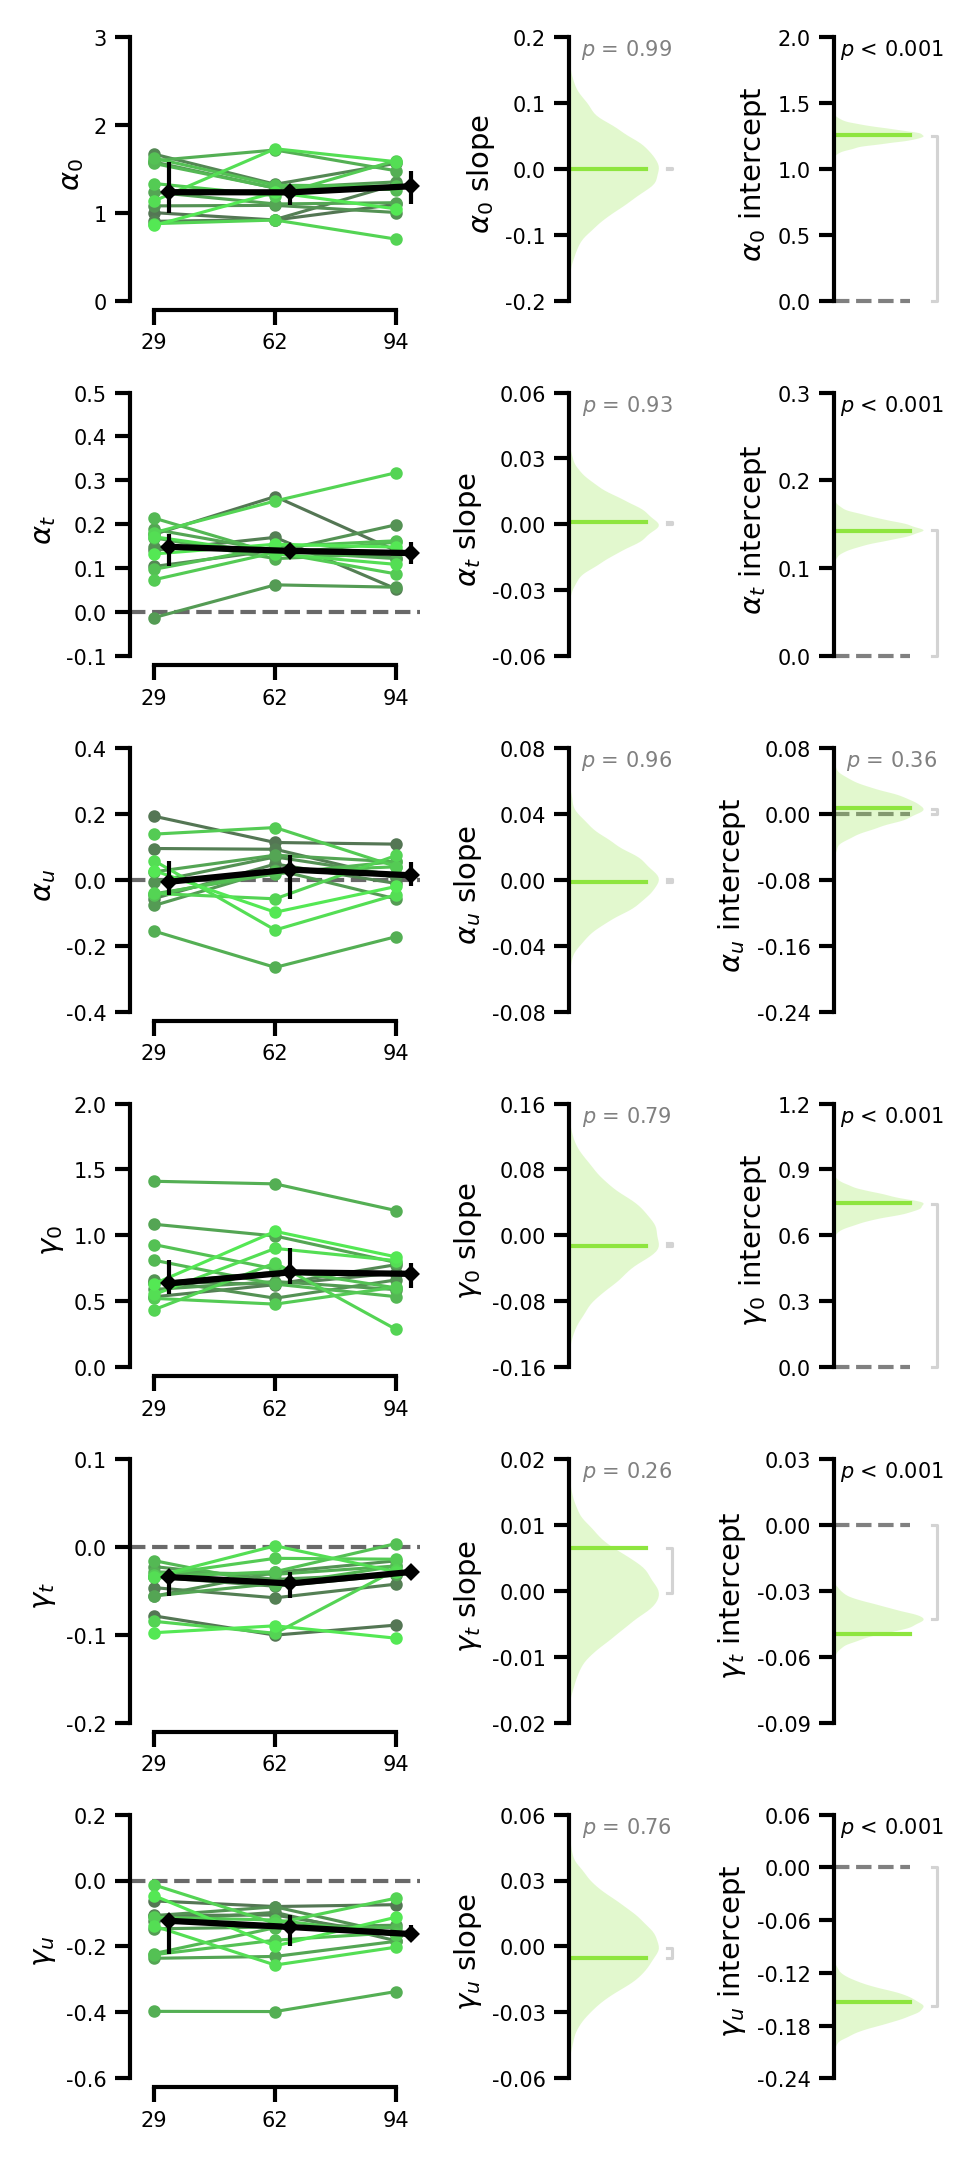

In [5]:
def FigureS12B_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [alpha_0[animal]["60"], alpha_0[animal]["90"], alpha_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_ylabel(r'$\alpha_0$')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS12B_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [alpha_t[animal]["60"], alpha_t[animal]["90"], alpha_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-.1, .5)
    ax.set_yticks([-.1, 0, .1, .2, .3, .4, .5])
    ax.set_ylabel(r'$\alpha_t$')

    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS12B_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [alpha_u[animal]["60"], alpha_u[animal]["90"], alpha_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.4, .4)
    ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
    ax.set_ylabel(r'$\alpha_u$')

    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS12C_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [gamma_0[animal]["60"], gamma_0[animal]["90"], gamma_0[animal]["120"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, label='Individuals', zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(0, 2)
    ax.set_yticks([0, 0.5, 1, 1.5, 2])
    ax.set_ylabel(r'$\gamma_0$')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_0, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS12C_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [gamma_t[animal]["60"], gamma_t[animal]["90"], gamma_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.2, 0.1)
    ax.set_yticks([-0.2, -.1, 0, 0.1])
    ax.set_ylabel(r'$\gamma_t$')

    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_t, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')

def FigureS12C_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [gamma_u[animal]["60"], gamma_u[animal]["90"], gamma_u[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 2)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["29", "62", "94"])
    if show_xlabel:
        ax.set_xlabel("Distance (cm)")

    ax.set_ylim(-0.6, 0.2)
    ax.set_yticks([-.6, -.4, -.2, 0, .2])
    ax.set_ylabel(r'$\gamma_u$')
    
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_u, ax=ax, dist_or_tm='dist', animalList=animalList, err='percentile')


def FigureS12B_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    alpha_0, _, _, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    regression_permutation(alpha_0, dist_or_tm='dist', varname=r'$\alpha_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.2, -0.1, 0, 0.1, 0.2], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def FigureS12B_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, alpha_t, _, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(alpha_t, dist_or_tm='dist', varname=r'$\alpha_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.06, -.03, 0, .03, .06], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .1, .2, .3])

def FigureS12B_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, alpha_u, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(alpha_u, dist_or_tm='dist', varname=r'$\alpha_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.08, -.04, 0, .04, .08],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.24, -.16, -.08, 0, .08],)

def FigureS12C_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, gamma_0, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_0, dist_or_tm='dist', varname=r'$\gamma_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.16, -.08, 0, .08, .16],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .3, .6, .9, 1.2])

def FigureS12C_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, gamma_t, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_t, dist_or_tm='dist', varname=r'$\gamma_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.09, -.06, -.03, 0, 0.03])

def FigureS12C_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, gamma_u, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_u, dist_or_tm='dist', varname=r'$\gamma_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.06, -.03, 0, .03, .06],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.24, -.18, -.12, -0.06, 0, 0.06])


fig, axs = plt.subplots(6, 3, figsize=(cm2inch(8), cm2inch(18)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS12B_zero(axs[0, 0])
FigureS12B_t(axs[1, 0])
FigureS12B_u(axs[2, 0])
FigureS12C_zero(axs[3, 0])
FigureS12C_t(axs[4, 0])
FigureS12C_u(axs[5, 0])

FigureS12B_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS12B_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS12B_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])
FigureS12C_zero_stats(ax_slope=axs[3, 1], ax_intercept=axs[3, 2])
FigureS12C_t_stats(ax_slope=axs[4, 1], ax_intercept=axs[4, 2])
FigureS12C_u_stats(ax_slope=axs[5, 1], ax_intercept=axs[5, 2])

# S12B Effect of treadmill belt velocity on α0, αt and αu
# S12C Effect of treadmill belt velocity on γ0, γt and γu

$\gamma_0$: p_s=0.003, p_i=0.000, obs_slope=-0.060, obs_intercept=1.049
$\gamma_t$: p_s=0.106, p_i=0.000, obs_slope=0.005, obs_intercept=-0.080
$\gamma_u$: p_s=0.049, p_i=0.000, obs_slope=0.012, obs_intercept=-0.211
$\gamma_0$: p_s=0.003, p_i=0.000, obs_slope=-0.060, obs_intercept=1.049
$\gamma_t$: p_s=0.106, p_i=0.000, obs_slope=0.005, obs_intercept=-0.080
$\gamma_u$: p_s=0.049, p_i=0.000, obs_slope=0.012, obs_intercept=-0.211


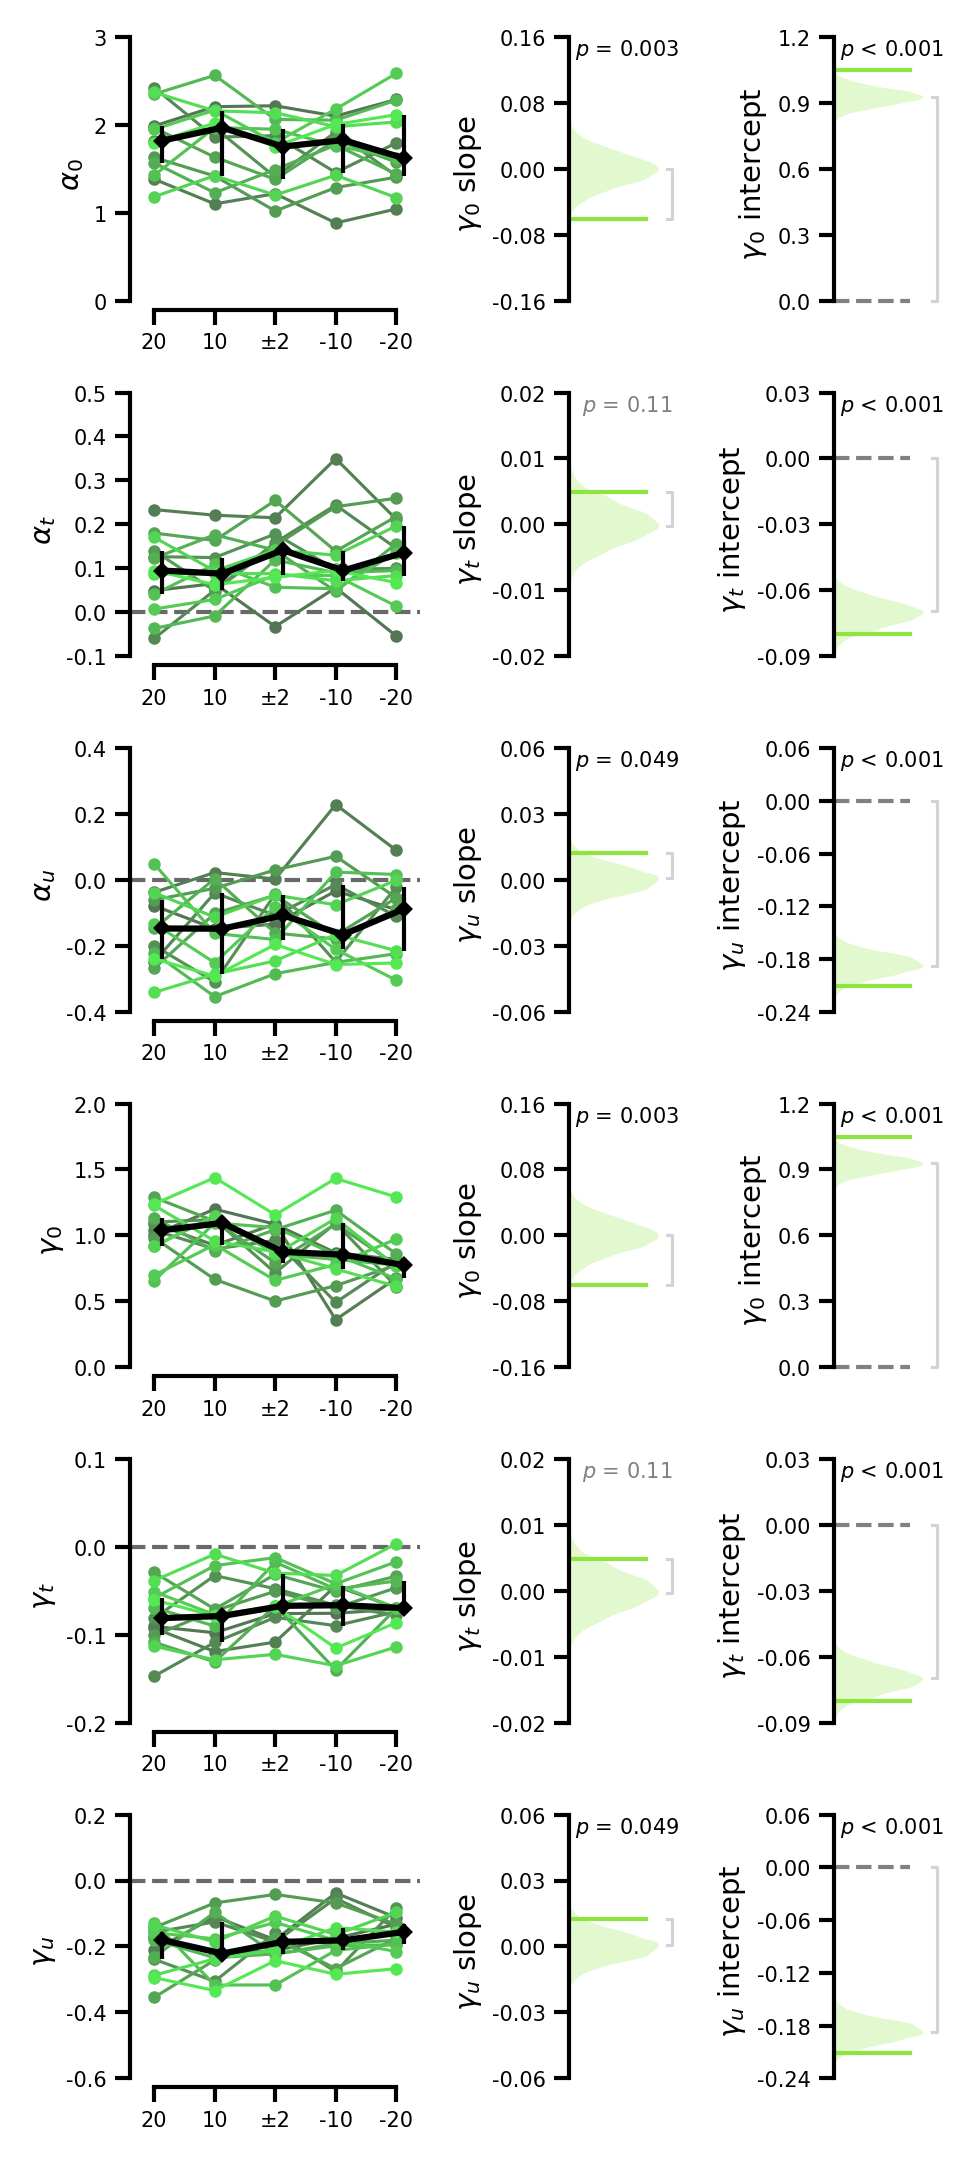

In [6]:
def FigureS12E_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [alpha_0[animal]["20"], alpha_0[animal]["10"], 
                                  alpha_0[animal]["2"], alpha_0[animal]["rev10"], 
                                  alpha_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, label='Individuals', zorder= 5)
        
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_ylabel(r'$\alpha_0$')

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS12E_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [alpha_t[animal]["20"], alpha_t[animal]["10"], alpha_t[animal]["2"], alpha_t[animal]["rev10"], alpha_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.1, .5)
    ax.set_yticks([-0.1, 0, .1, .2, .3, .4, .5])
    ax.set_ylabel(r'$\alpha_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)

    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS12E_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [alpha_u[animal]["20"], alpha_u[animal]["10"], alpha_u[animal]["2"], alpha_u[animal]["rev10"], alpha_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)
        
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.4, .4)
    ax.set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
    ax.set_ylabel(r'$\alpha_u$')

    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(alpha_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS12F_zero(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [gamma_0[animal]["20"], gamma_0[animal]["10"], gamma_0[animal]["2"], gamma_0[animal]["rev10"], gamma_0[animal]["rev20"]], 
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], lw=.75,
                        markersize=2, label='Individuals', zorder= 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(0, 2)
    ax.set_yticks([0, 0.5, 1, 1.5, 2])
    ax.set_ylabel(r'$\gamma_0$')
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_0, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS12F_t(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [gamma_t[animal]["20"], gamma_t[animal]["10"], gamma_t[animal]["2"], gamma_t[animal]["rev10"], gamma_t[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)

    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.2, 0.1)
    ax.set_yticks([-0.2, -.1, 0, 0.1])
    ax.set_ylabel(r'$\gamma_t$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_t, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')

def FigureS12F_u(ax=None, show_xlabel=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    alpha_0, alpha_t, alpha_u, gamma_0, gamma_t, gamma_u, mu_0, mu_t, mu_u, sigma_0, sigma_t, sigma_u = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [gamma_u[animal]["20"], gamma_u[animal]["10"], gamma_u[animal]["2"], gamma_u[animal]["rev10"], gamma_u[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], lw=.75,
                        markersize=2, zorder= 5)
        
    ax.set_xlim(0, 4)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["20", "10", "±2", "-10", "-20"])
    _ = r'$v_{belt}$'
    if show_xlabel:
        ax.set_xlabel(f'{_} (cm/s)')

    ax.set_ylim(-0.6, 0.2)
    ax.set_yticks([-.6, -.4, -.2, 0, .2])
    ax.set_ylabel(r'$\gamma_u$')
    ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=1, zorder=0)
    space_axes(ax, x_ratio_left=.1, x_ratio_right=.1)
    plotmedian(gamma_u, ax=ax, dist_or_tm='tm', animalList=animalList, err='percentile')


def FigureS12E_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    alpha_0, _, _, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(alpha_0, dist_or_tm='tm', varname=r'$\alpha_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-0.2, -0.1, 0, 0.1, 0.2], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .5, 1, 1.5, 2])

def FigureS12E_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, alpha_t, _, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(alpha_t, dist_or_tm='tm', varname=r'$\alpha_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.06, -.03, 0, .03, .06], 
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .1, .2, .3])

def FigureS12E_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, alpha_u, _, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(alpha_u, dist_or_tm='tm', varname=r'$\alpha_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.08, -.04, 0, .04, .08],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.24, -.16, -.08, 0, .08],)

def FigureS12E_zero_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, gamma_0, _, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_0, dist_or_tm='tm', varname=r'$\gamma_0$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.16, -.08, 0, .08, .16],
                        ax_intercept=ax_intercept, y_ticks_intercept=[0, .3, .6, .9, 1.2])

def FigureS12E_t_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, gamma_t, _, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_t, dist_or_tm='tm', varname=r'$\gamma_t$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.02, -.01, 0, .01, .02],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.09, -.06, -.03, 0, 0.03])

def FigureS12E_u_stats(ax_slope=None, ax_intercept=None):
    if ax_slope is None or ax_intercept is None:
        _, (ax_slope, ax_intercept) = plt.subplots(1, 2, figsize=(10, 5))
    _, _, _, _, _, gamma_u, _, _, _, _, _, _ = pickle.load(open("picklejar/ModelsFitsAllRats.p", "rb"))
    regression_permutation(gamma_u, dist_or_tm='tm', varname=r'$\gamma_u$', lesioned_animals=True,
                        ax_slope=ax_slope, yticks_slope=[-.06, -.03, 0, .03, .06],
                        ax_intercept=ax_intercept, y_ticks_intercept=[-.24, -.18, -.12, -0.06, 0, 0.06])

fig, axs = plt.subplots(6, 3, figsize=(cm2inch(8), cm2inch(18)), gridspec_kw={'width_ratios': [2.5, 1, 1]})
FigureS12E_zero(axs[0, 0])
FigureS12E_t(axs[1, 0])
FigureS12E_u(axs[2, 0])
FigureS12F_zero(axs[3, 0])
FigureS12F_t(axs[4, 0])
FigureS12F_u(axs[5, 0])

FigureS12E_zero_stats(ax_slope=axs[0, 1], ax_intercept=axs[0, 2])
FigureS12E_t_stats(ax_slope=axs[1, 1], ax_intercept=axs[1, 2])
FigureS12E_u_stats(ax_slope=axs[2, 1], ax_intercept=axs[2, 2])
FigureS12E_zero_stats(ax_slope=axs[3, 1], ax_intercept=axs[3, 2])
FigureS12E_t_stats(ax_slope=axs[4, 1], ax_intercept=axs[4, 2])
FigureS12E_u_stats(ax_slope=axs[5, 1], ax_intercept=axs[5, 2])

# Figure S12: Modulation of decision parameters during sessions and across action costs in dStr-lesioned rats. 

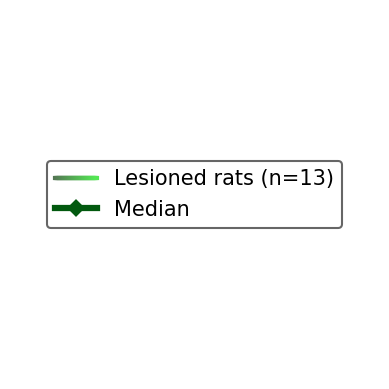

In [7]:
def dummy_legend(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    median_lesion = ax.plot([-100, -101], [-100, -101], color='xkcd:deep green', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median lesioned rats', zorder=5)
    
    add_colored_lesion(ax=ax, loc='center', bbox=(.5, .5),
                       handles=[median_lesion], labels=['Median'],
                       text=f'Lesioned rats (n={len(animalList)})')
    ax.axis('off')
    ax.set_xlim(10, 11)
    ax.set_ylim(10, 11)

fig, axs = plt.subplots(1, 1, figsize=(cm2inch(3), cm2inch(3)))
dummy_legend(ax=axs)

$\alpha_0$: p_s=0.989, p_i=0.000, obs_slope=-0.001, obs_intercept=1.254
$\alpha_t$: p_s=0.927, p_i=0.000, obs_slope=0.001, obs_intercept=0.143
$\alpha_u$: p_s=0.957, p_i=0.357, obs_slope=-0.001, obs_intercept=0.008
$\gamma_0$: p_s=0.788, p_i=0.000, obs_slope=-0.013, obs_intercept=0.749
$\gamma_t$: p_s=0.256, p_i=0.000, obs_slope=0.006, obs_intercept=-0.050
$\gamma_u$: p_s=0.760, p_i=0.000, obs_slope=-0.005, obs_intercept=-0.153
$\gamma_0$: p_s=0.003, p_i=0.000, obs_slope=-0.060, obs_intercept=1.049
$\gamma_t$: p_s=0.106, p_i=0.000, obs_slope=0.005, obs_intercept=-0.080
$\gamma_u$: p_s=0.049, p_i=0.000, obs_slope=0.012, obs_intercept=-0.211
$\gamma_0$: p_s=0.003, p_i=0.000, obs_slope=-0.060, obs_intercept=1.049
$\gamma_t$: p_s=0.106, p_i=0.000, obs_slope=0.005, obs_intercept=-0.080
$\gamma_u$: p_s=0.049, p_i=0.000, obs_slope=0.012, obs_intercept=-0.211


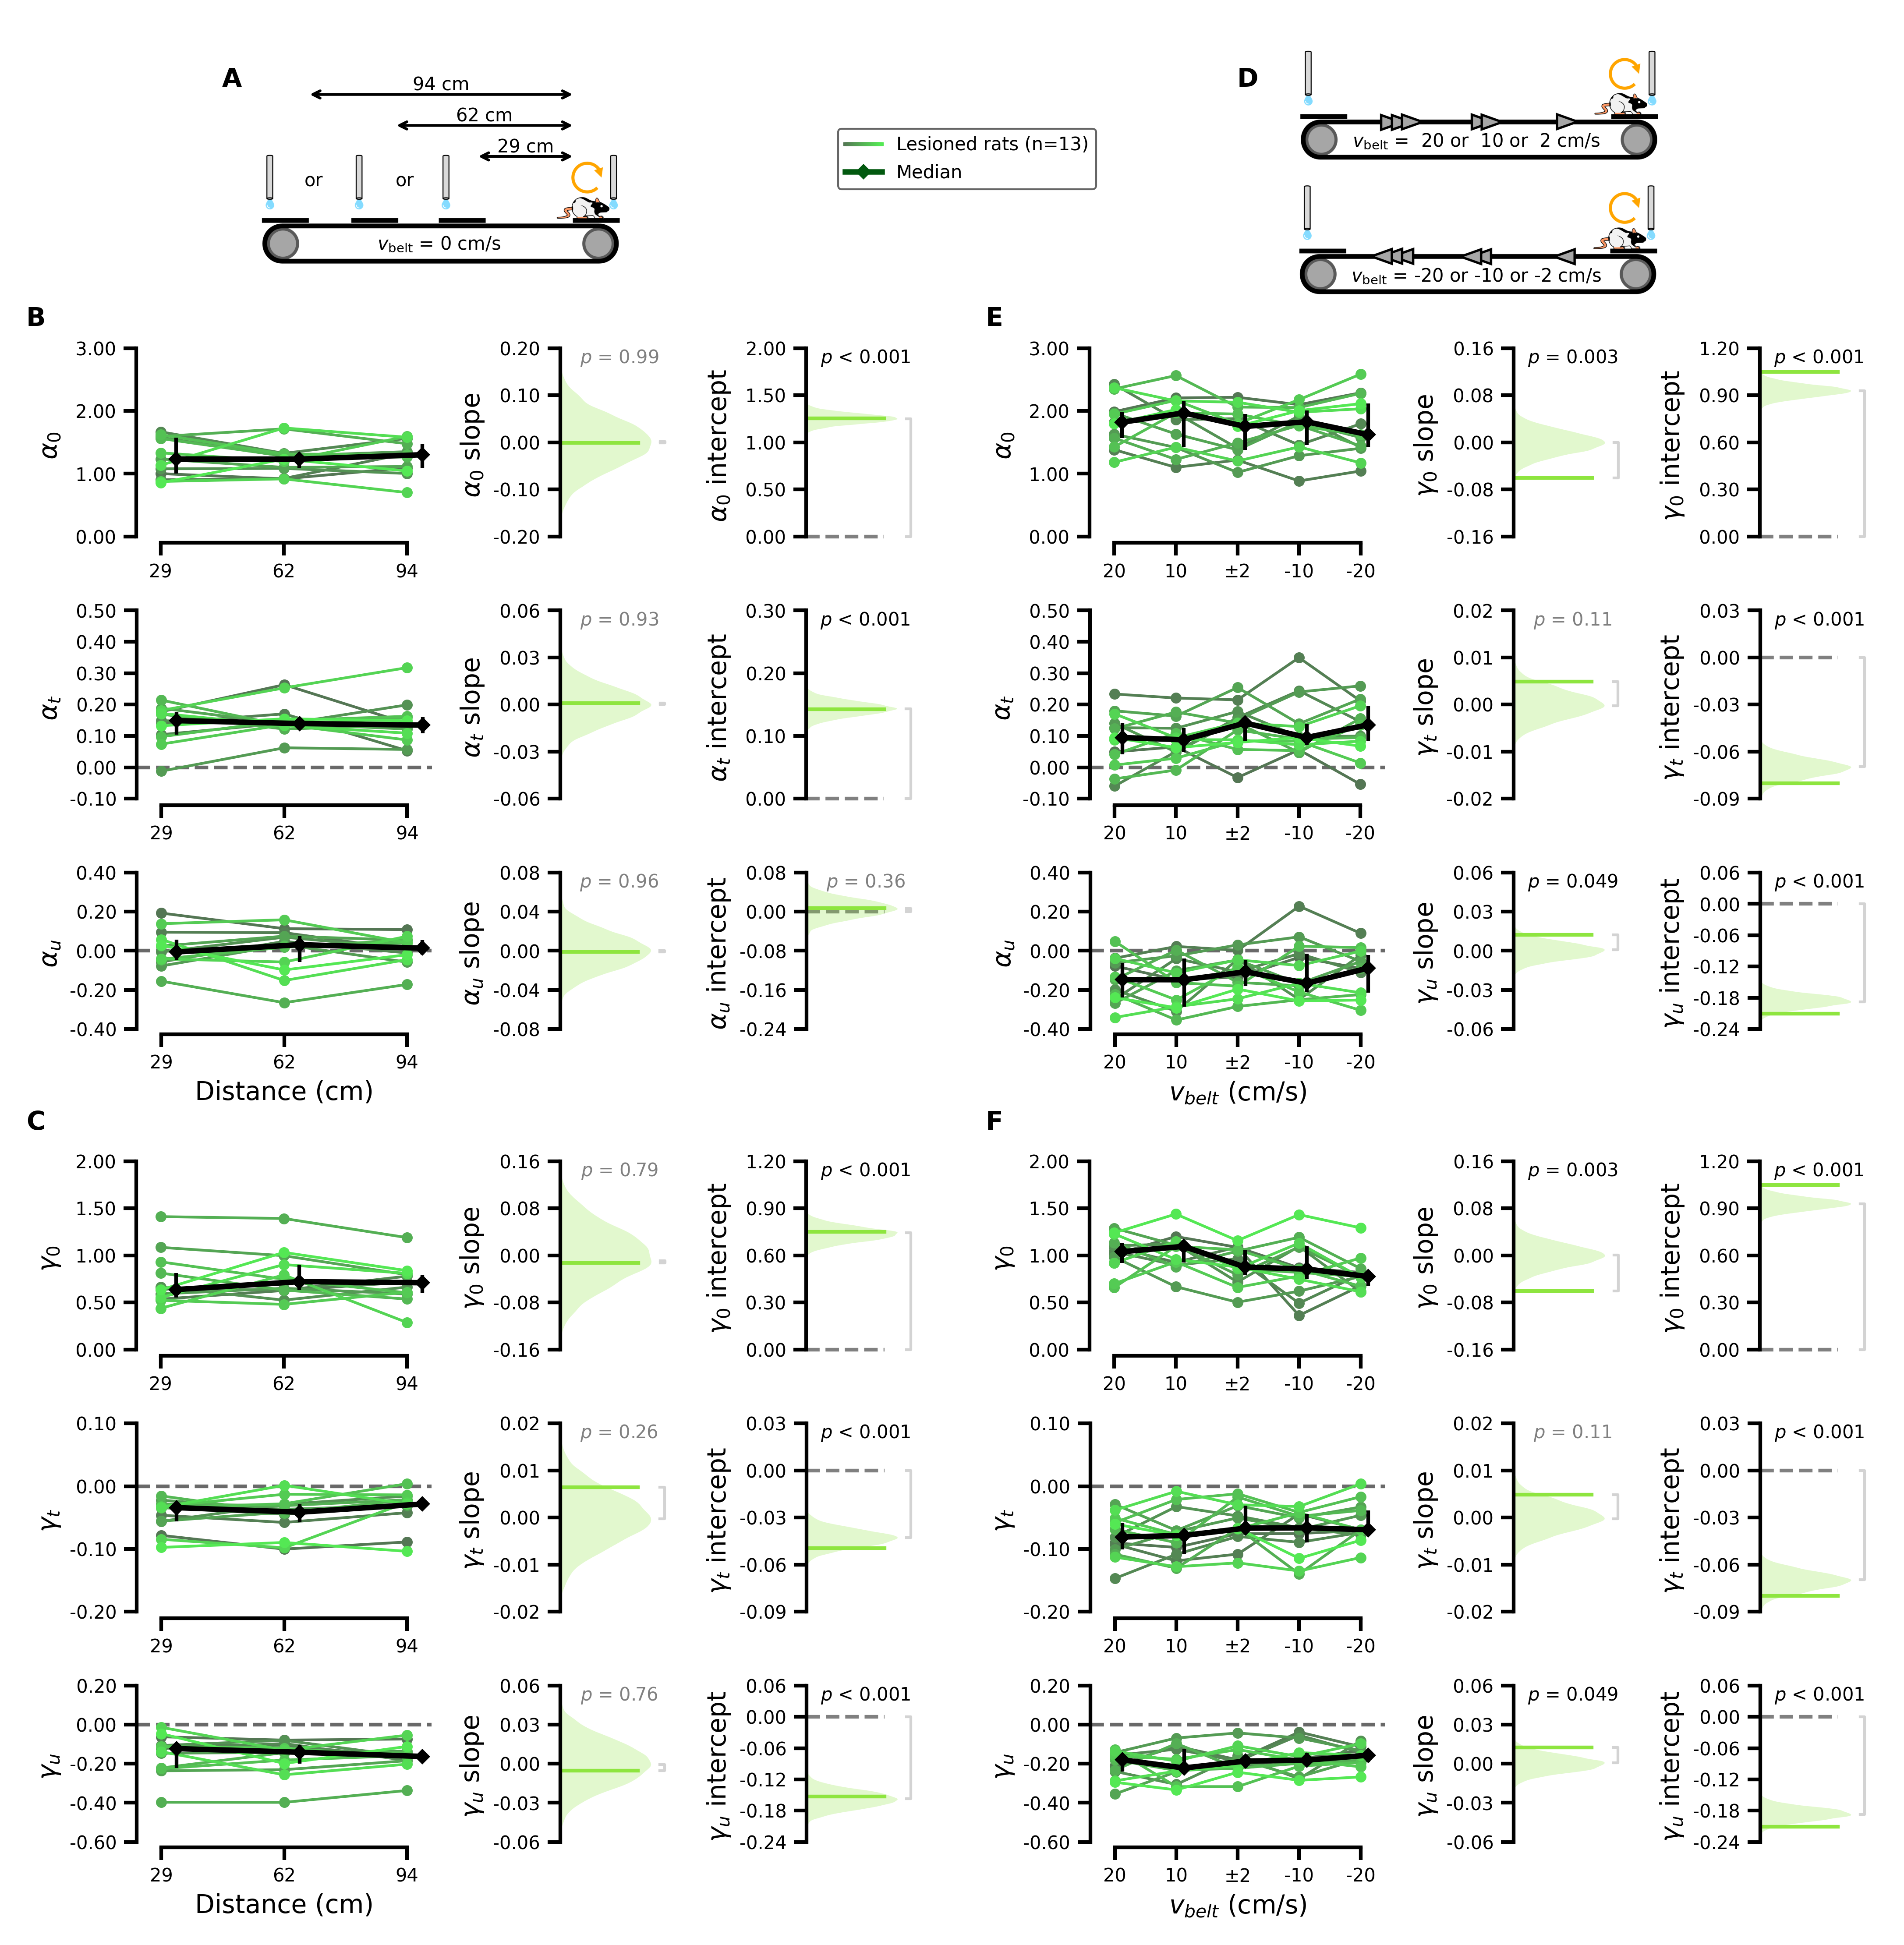

In [8]:

fig = plt.figure(figsize=(cm2inch(18), cm2inch(18.5)), 
                 constrained_layout=True, facecolor='w', dpi=600)

gs0 = fig.add_gridspec(8, 1, height_ratios=[1.2, 1, 1, 1, .1, 1, 1, 1])

row1 = gs0[0].subgridspec(1, 3, wspace=.5, hspace=.5, width_ratios=[1, .2, 1])
distance_schematic = plt.subplot(row1[0])
vbelt_schematic = plt.subplot(row1[2])

row2 = gs0[1].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_alpha_0_distance = plt.subplot(row2[0])
fit_alpha_0_distance_slope = plt.subplot(row2[1])
fit_alpha_0_distance_intercept = plt.subplot(row2[2])
fit_alpha_0_vbelt = plt.subplot(row2[4])
fit_alpha_0_vbelt_slope = plt.subplot(row2[5])
fit_alpha_0_vbelt_intercept = plt.subplot(row2[6])

row3 = gs0[2].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_alpha_t_distance = plt.subplot(row3[0])
fit_alpha_t_distance_slope = plt.subplot(row3[1])
fit_alpha_t_distance_intercept = plt.subplot(row3[2])
fit_alpha_t_vbelt = plt.subplot(row3[4])
fit_alpha_t_vbelt_slope = plt.subplot(row3[5])
fit_alpha_t_vbelt_intercept = plt.subplot(row3[6])

row4 = gs0[3].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_alpha_u_distance = plt.subplot(row4[0])
fit_alpha_u_distance_slope = plt.subplot(row4[1])
fit_alpha_u_distance_intercept = plt.subplot(row4[2])
fit_alpha_u_vbelt = plt.subplot(row4[4])
fit_alpha_u_vbelt_slope = plt.subplot(row4[5])
fit_alpha_u_vbelt_intercept = plt.subplot(row4[6])

row5 = gs0[5].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_gamma_0_distance = plt.subplot(row5[0])
fit_gamma_0_distance_slope = plt.subplot(row5[1])
fit_gamma_0_distance_intercept = plt.subplot(row5[2])
fit_gamma_0_vbelt = plt.subplot(row5[4])
fit_gamma_0_vbelt_slope = plt.subplot(row5[5])
fit_gamma_0_vbelt_intercept = plt.subplot(row5[6])

row6 = gs0[6].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_gamma_t_distance = plt.subplot(row6[0])
fit_gamma_t_distance_slope = plt.subplot(row6[1])
fit_gamma_t_distance_intercept = plt.subplot(row6[2])
fit_gamma_t_vbelt = plt.subplot(row6[4])
fit_gamma_t_vbelt_slope = plt.subplot(row6[5])
fit_gamma_t_vbelt_intercept = plt.subplot(row6[6])

row7 = gs0[7].subgridspec(1, 7, wspace=.5, hspace=.5, width_ratios=[2.5, 1, 1, .1, 2.5, 1, 1])
fit_gamma_u_distance = plt.subplot(row7[0])
fit_gamma_u_distance_slope = plt.subplot(row7[1])
fit_gamma_u_distance_intercept = plt.subplot(row7[2])
fit_gamma_u_vbelt = plt.subplot(row7[4])
fit_gamma_u_vbelt_slope = plt.subplot(row7[5])
fit_gamma_u_vbelt_intercept = plt.subplot(row7[6])




FigureS12A(ax=distance_schematic)
FigureS12D(ax=vbelt_schematic)

FigureS12B_zero(ax=fit_alpha_0_distance)
FigureS12B_t(ax=fit_alpha_t_distance)
FigureS12B_u(ax=fit_alpha_u_distance, show_xlabel=True)
FigureS12C_zero(ax=fit_gamma_0_distance)
FigureS12C_t(ax=fit_gamma_t_distance)
FigureS12C_u(ax=fit_gamma_u_distance, show_xlabel=True)

FigureS12B_zero_stats(ax_slope=fit_alpha_0_distance_slope, ax_intercept=fit_alpha_0_distance_intercept)
FigureS12B_t_stats(ax_slope=fit_alpha_t_distance_slope, ax_intercept=fit_alpha_t_distance_intercept)
FigureS12B_u_stats(ax_slope=fit_alpha_u_distance_slope, ax_intercept=fit_alpha_u_distance_intercept)
FigureS12C_zero_stats(ax_slope=fit_gamma_0_distance_slope, ax_intercept=fit_gamma_0_distance_intercept)
FigureS12C_t_stats(ax_slope=fit_gamma_t_distance_slope, ax_intercept=fit_gamma_t_distance_intercept)
FigureS12C_u_stats(ax_slope=fit_gamma_u_distance_slope, ax_intercept=fit_gamma_u_distance_intercept)


FigureS12E_zero(ax=fit_alpha_0_vbelt)
FigureS12E_t(ax=fit_alpha_t_vbelt)
FigureS12E_u(ax=fit_alpha_u_vbelt, show_xlabel=True)
FigureS12F_zero(ax=fit_gamma_0_vbelt)
FigureS12F_t(ax=fit_gamma_t_vbelt)
FigureS12F_u(ax=fit_gamma_u_vbelt, show_xlabel=True)

FigureS12E_zero_stats(ax_slope=fit_alpha_0_vbelt_slope, ax_intercept=fit_alpha_0_vbelt_intercept)
FigureS12E_t_stats(ax_slope=fit_alpha_t_vbelt_slope, ax_intercept=fit_alpha_t_vbelt_intercept)
FigureS12E_u_stats(ax_slope=fit_alpha_u_vbelt_slope, ax_intercept=fit_alpha_u_vbelt_intercept)
FigureS12E_zero_stats(ax_slope=fit_gamma_0_vbelt_slope, ax_intercept=fit_gamma_0_vbelt_intercept)
FigureS12E_t_stats(ax_slope=fit_gamma_t_vbelt_slope, ax_intercept=fit_gamma_t_vbelt_intercept)
FigureS12E_u_stats(ax_slope=fit_gamma_u_vbelt_slope, ax_intercept=fit_gamma_u_vbelt_intercept)

axes = fig.get_axes()
for ax in axes:
    ax.yaxis.set_major_formatter('{x:>5.2f}')
    
legend = fig.add_axes([.5, .92, .01, .01])
dummy_legend(ax=legend)

figuresLabels={"A":[0.105, .96], "D":[0.65, .96], 
               "B":[0.0, .835], "E":[0.515, .835],
               "C":[0.0, .415], "F":[0.515, .415],
               }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1],
             label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')

plt.savefig("./Figures_paper/Figure_S12.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)
plt.savefig("./Figures_paper/Figure_S12.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)